# In this question, you will be implementing a bloom filter and calculate false positive rate on varying its length


In [39]:
import pandas as pd
path = 'datarepo/'
df=pd.read_csv(path+'pvqr-7yc4.csv')

/var/folders/dk/fythzssx3lq37wtzhfb9yl6c0000gq/T/ipykernel_60646/4110301434.py:3: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+'pvqr-7yc4.csv')


We will be using insert_lst as the set of elements to insert into the filter

In [40]:
insert_lst = (list(df['Summons Number'].values))

# Part 1: Implement the class file
Below is the bloom filter class. You have to implement two functions

i. Add: which adds an element to the filter

ii. lookup: which checks for the presence of an element in the filter

### Information about hashing: 
hash_params is a list of k elements, where each element corresponds to the parameters of a hash function. 
You can use the calculate_hash function to hash each element. Specifically, it takes an element along with any hash parameter as input and returns its hash value.

In [41]:
from bitarray import bitarray
import hashlib
import random
import math
random.seed(0)

class BloomFilter(object):
    def __init__(self, size, hash_count):
        """
        size: size of bit array
        hash_count: number of hash functions to use
        """
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.hash_param = []
        i=0
        while i<hash_count:
            a=random.randint(1,9999)
            b=random.randint(1,9999)
            p = self.generate_large_prime(30)
            self.hash_param.append((a,b,p))
            i+=1
            
    def generate_large_prime(self, bit_size):

        random_number = random.getrandbits(bit_size)
        
        while not self.is_prime(random_number):
            random_number = random.getrandbits(bit_size)
        return random_number

    def is_prime(self, number):
        if number % 2 == 0:
            return False


        for i in range(3, int(math.sqrt(number)) + 1, 2):
            if number % i == 0:
                return False

        return True
    def calculate_hash(self,item,hash_params):
        item_val = (hash_params[0]*item + hash_params[1])%hash_params[2]
        #print (item_val,hash_params[2])
        return item_val
    
    
    def add(self, item):
        """
        Add an item in the filter
        """
        for i in range(self.hash_count):
            hash_val = self.calculate_hash(item,self.hash_param[i])
            self.bit_array[hash_val%self.size] = 1
        

    def lookup(self, item):
        """
        Check for existence of an item in filter
        """
        
        for i in range(self.hash_count):
            hash_val = self.calculate_hash(item,self.hash_param[i])
            if self.bit_array[hash_val%self.size] == 0:
                return False
        return True 



# Part 2: Calculate false positive rate
1. You need to extend this code to calculate false negative and false positive rate as a function of bloom filter length. To calculate these values, you need to check for presence of bloom_filter_check.csv values in the bloom filter.

    Plot false positive rate vs m and false negative rate vs m (where m is the length of bloom filter).
    Fix k = 3
    
    Even if you know what false positive/negative rate should be, the goal of this exercise is to verify if your code is as expected

2. Find the smallest length such that false positive rate is less than 0.10

In [42]:
def test_bloom_filter(m_values, values_to_check, insert_set):
    false_positives = []
    false_negatives = []
    for m in m_values:
        bf = BloomFilter(m, 3)
        for val in insert_set:
            bf.add(val)
        print("Inserted all values for m = ", m)

        num_false_positives = 0
        num_false_negatives = 0
        num_true_positives = 0
        num_true_negatives = 0
        for val in values_to_check:
            exists_in_bloom_filter = bf.lookup(val)
            exists_in_insert_set = val in insert_set
            if exists_in_bloom_filter and not exists_in_insert_set:
                num_false_positives += 1
            if not exists_in_bloom_filter and exists_in_insert_set:
                num_false_negatives += 1
            if exists_in_bloom_filter and exists_in_insert_set:
                num_true_positives += 1
            if not exists_in_bloom_filter and not exists_in_insert_set:
                num_true_negatives += 1
        false_positives.append(num_false_positives/(num_false_positives+num_true_negatives))
        false_negatives.append(num_false_negatives/(num_false_negatives+num_true_positives))
    return false_positives, false_negatives
    

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def plot_false_positives_and_negatives(m_values, false_positives, false_negatives, size=None):
    if size:
        m_values = np.array(m_values)
        expected_false_postive_rate = (1-np.exp(-3*size/m_values))**3
        plt.plot(m_values, expected_false_postive_rate, label='Expected false positive rate')
    plt.plot(m_values, false_positives, label='False positives')
    plt.plot(m_values, false_negatives, label='False negatives')

    plt.xlabel('Size of bit array (m)')
    plt.ylabel('False positive/negative rate')
    plt.legend()
    plt.show()

In [49]:
values_to_check = set(pd.read_csv('bloom_filter_check.csv', header=None)[0].values)
num_values = len(values_to_check)
print("Number of values to check: ", num_values)
insert_set = set(insert_lst)
num_insert_values = len(insert_set)
print("Number of values to insert: ", num_insert_values)

Number of values to check:  299207
Number of values to insert:  6178250


In [47]:
m_values = range(int(1e7), int(1e8), int(1e7))
false_positives, false_negatives = test_bloom_filter(m_values, values_to_check, insert_set)

Inserted all values for m =  10000000
Inserted all values for m =  20000000
Inserted all values for m =  30000000
Inserted all values for m =  40000000
Inserted all values for m =  50000000
Inserted all values for m =  60000000
Inserted all values for m =  70000000
Inserted all values for m =  80000000
Inserted all values for m =  90000000


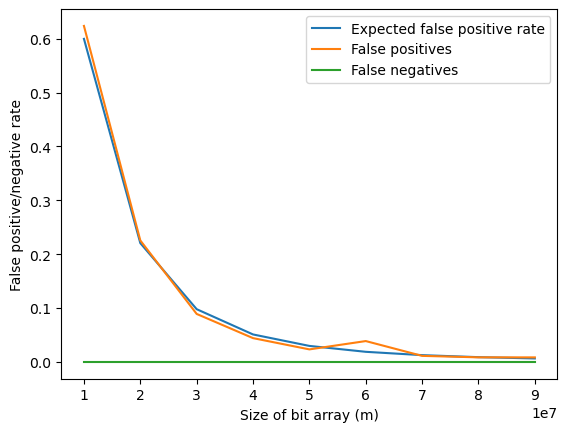

In [50]:
plot_false_positives_and_negatives(m_values, false_positives, false_negatives, size=num_insert_values)

Inserted all values for m =  20000000
Inserted all values for m =  21000000
Inserted all values for m =  22000000
Inserted all values for m =  23000000
Inserted all values for m =  24000000
Inserted all values for m =  25000000
Inserted all values for m =  26000000
Inserted all values for m =  27000000
Inserted all values for m =  28000000
Inserted all values for m =  29000000
Inserted all values for m =  30000000
Inserted all values for m =  31000000
Inserted all values for m =  32000000
Inserted all values for m =  33000000
Inserted all values for m =  34000000
Inserted all values for m =  35000000
Inserted all values for m =  36000000
Inserted all values for m =  37000000
Inserted all values for m =  38000000
Inserted all values for m =  39000000


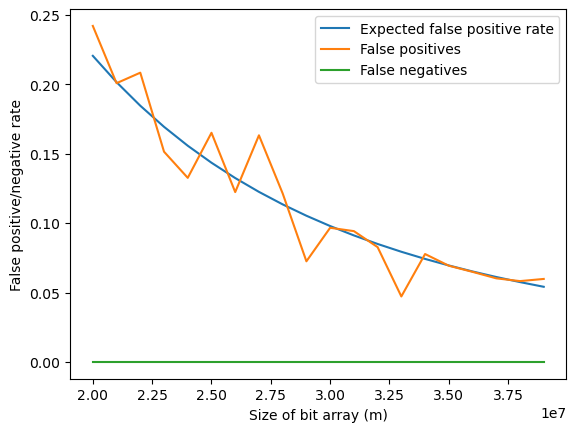

In [52]:
m_values = range(int(2e7), int(4e7), int(1e6))
false_positives, false_negatives = test_bloom_filter(m_values, values_to_check, insert_set)
plot_false_positives_and_negatives(m_values, false_positives, false_negatives, size=num_insert_values)

In [53]:
print(list(zip(m_values, false_positives)))

[(20000000, 0.24206961202334512), (21000000, 0.2008124426703761), (22000000, 0.20838247301097704), (23000000, 0.15146108641527312), (24000000, 0.13261161006783795), (25000000, 0.16508915701512997), (26000000, 0.1223603173163184), (27000000, 0.16326468898364027), (28000000, 0.1213724837965063), (29000000, 0.07248480449968248), (30000000, 0.09664640599957665), (31000000, 0.09422722186942453), (32000000, 0.0826957775156995), (33000000, 0.04716401060409044), (34000000, 0.07772637011501204), (35000000, 0.06930962532885784), (36000000, 0.06488453435745462), (37000000, 0.060217524973036174), (38000000, 0.05822169806566069), (39000000, 0.059784087816383925)]


Inserted all values for m =  27000000
Inserted all values for m =  27100000
Inserted all values for m =  27200000
Inserted all values for m =  27300000
Inserted all values for m =  27400000
Inserted all values for m =  27500000
Inserted all values for m =  27600000
Inserted all values for m =  27700000
Inserted all values for m =  27800000
Inserted all values for m =  27900000
Inserted all values for m =  28000000
Inserted all values for m =  28100000
Inserted all values for m =  28200000
Inserted all values for m =  28300000
Inserted all values for m =  28400000
Inserted all values for m =  28500000
Inserted all values for m =  28600000
Inserted all values for m =  28700000
Inserted all values for m =  28800000
Inserted all values for m =  28900000
Inserted all values for m =  29000000
Inserted all values for m =  29100000
Inserted all values for m =  29200000
Inserted all values for m =  29300000
Inserted all values for m =  29400000
Inserted all values for m =  29500000
Inserted all

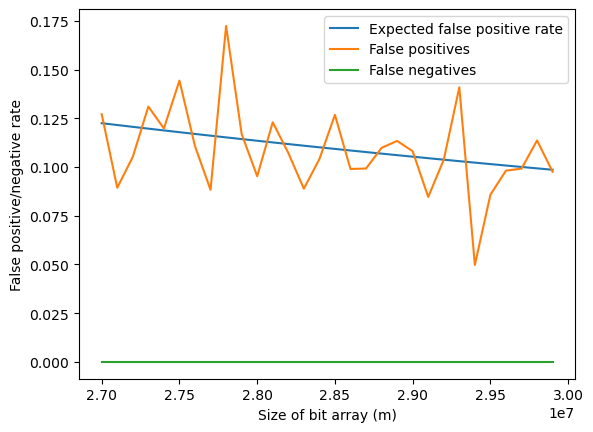

In [58]:
m_values = range(27000000, 30000000, 100000)
false_positives, false_negatives = test_bloom_filter(m_values, values_to_check, insert_set)
plot_false_positives_and_negatives(m_values, false_positives, false_negatives, size=num_insert_values)

In [59]:
print(list(zip(m_values, false_positives)))

[(27000000, 0.1271281260394932), (27100000, 0.08939893354299595), (27200000, 0.10521434979386535), (27300000, 0.13101898051548783), (27400000, 0.11982017397965869), (27500000, 0.14434465309907568), (27600000, 0.11070791375608575), (27700000, 0.08829014081667624), (27800000, 0.17241726894271572), (27900000, 0.11699779249448124), (28000000, 0.09528561492636609), (28100000, 0.12297519328273207), (28200000, 0.10727065630449464), (28300000, 0.08889493684921428), (28400000, 0.10404507746429184), (28500000, 0.12678540828772164), (28600000, 0.09901519046035058), (28700000, 0.09923694900561453), (28800000, 0.10984103944278126), (28900000, 0.11341941596863124), (29000000, 0.10812745068392351), (29100000, 0.08465128468757245), (29200000, 0.10377291924964972), (29300000, 0.1409174755813602), (29400000, 0.04974447367625268), (29500000, 0.08582055701714597), (29600000, 0.09815839608092171), (29700000, 0.09917646940236072), (29800000, 0.11363109458001955), (29900000, 0.09757375991613496)]
